In [1]:
from datetime import date
from nsepy import get_history
import numpy as np
import pandas as pd
import pickle

In [2]:
df = pd.read_csv('ind_nifty50list.csv')
nifty_companies_symbols=df['Symbol'].values.tolist()

In [9]:
start = date(2021, 1, 1)
end = date(2022, 12, 31)
all_data=pd.DataFrame(columns=['Symbol','Close','P/L %'])
for symbol in nifty_companies_symbols:
    data = get_history(symbol=symbol, start=start, end=end)
    data=data[['Symbol','Close']]
    data['P/L %']=data['Close'].pct_change(periods=250)*100
    all_data=pd.concat([all_data,data])
all_data

,Symbol,Close,P/L %
2021-01-01,ADANIENT,491.15,NaN
2021-01-04,ADANIENT,494.50,NaN
2021-01-05,ADANIENT,494.40,NaN
2021-01-06,ADANIENT,490.90,NaN
2021-01-07,ADANIENT,518.10,NaN
...,...,...,...
2022-12-26,WIPRO,380.50,-45.216327
2022-12-27,WIPRO,386.60,-44.648865
2022-12-28,WIPRO,387.80,-44.568325
2022-12-29,WIPRO,390.75,-44.609824


In [10]:
all_data=all_data.dropna()
all_data.reset_index(names='Date',inplace=True)

In [11]:
all_data.sort_values(by=['Date','P/L %'],inplace=True,ascending=[True,False])

C:\Users\Pratyush\AppData\Local\Temp\ipykernel_28044\374801556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.sort_values(by=['Date','P/L %'],inplace=True,ascending=[True,False])


In [13]:
all_data.reset_index(drop=True)

,Date,Symbol,Close,P/L %
0,2022-01-05,ADANIENT,1715.45,249.272116
1,2022-01-05,TATAMOTORS,489.75,162.600536
2,2022-01-05,APOLLOHOSP,4973.25,105.944469
3,2022-01-05,BAJAJFINSV,17988.40,102.790163
4,2022-01-05,HINDALCO,475.35,99.433606
...,...,...,...,...
12295,2022-12-30,DIVISLAB,3413.20,-26.146789
12296,2022-12-30,TECHM,1016.40,-43.117777
12297,2022-12-30,WIPRO,392.75,-44.187864
12298,2022-12-30,TATASTEEL,112.65,-89.908175


In [18]:
print(

[datetime.date(2022, 1, 5) datetime.date(2022, 1, 6)
 datetime.date(2022, 1, 7) datetime.date(2022, 1, 10)
 datetime.date(2022, 1, 11) datetime.date(2022, 1, 12)
 datetime.date(2022, 1, 13) datetime.date(2022, 1, 14)
 datetime.date(2022, 1, 17) datetime.date(2022, 1, 18)
 datetime.date(2022, 1, 19) datetime.date(2022, 1, 20)
 datetime.date(2022, 1, 21) datetime.date(2022, 1, 24)
 datetime.date(2022, 1, 25) datetime.date(2022, 1, 27)
 datetime.date(2022, 1, 28) datetime.date(2022, 1, 31)
 datetime.date(2022, 2, 1) datetime.date(2022, 2, 2)
 datetime.date(2022, 2, 3) datetime.date(2022, 2, 4)
 datetime.date(2022, 2, 7) datetime.date(2022, 2, 8)
 datetime.date(2022, 2, 9) datetime.date(2022, 2, 10)
 datetime.date(2022, 2, 11) datetime.date(2022, 2, 14)
 datetime.date(2022, 2, 15) datetime.date(2022, 2, 16)
 datetime.date(2022, 2, 17) datetime.date(2022, 2, 18)
 datetime.date(2022, 2, 21) datetime.date(2022, 2, 22)
 datetime.date(2022, 2, 23) datetime.date(2022, 2, 24)
 datetime.date(2022,

In [26]:
from dateutil.relativedelta import relativedelta
backtest_start=date(2022, 1, 5)
backtest_end=date(2022, 12, 30)
temp=backtest_start
temp_list=[]
while temp<=backtest_end:
    if temp in all_data.Date.unique():
        temp_list.append(temp)
        temp =temp + relativedelta(months=+1)  
    else:
        temp=temp+relativedelta(days=+1)
    
print(temp_list)

[datetime.date(2022, 1, 5), datetime.date(2022, 2, 7), datetime.date(2022, 3, 7), datetime.date(2022, 4, 7), datetime.date(2022, 5, 9), datetime.date(2022, 6, 9), datetime.date(2022, 7, 11), datetime.date(2022, 8, 11), datetime.date(2022, 9, 12), datetime.date(2022, 10, 12), datetime.date(2022, 11, 14), datetime.date(2022, 12, 14)]


In [27]:
df5=all_data[all_data.Date.isin(temp_list)]
df5

,Date,Symbol,Close,P/L %
0,2022-01-05,ADANIENT,1715.45,249.272116
10578,2022-01-05,TATAMOTORS,489.75,162.600536
492,2022-01-05,APOLLOHOSP,4973.25,105.944469
1722,2022-01-05,BAJAJFINSV,17988.40,102.790163
5166,2022-01-05,HINDALCO,475.35,99.433606
...,...,...,...,...
3431,2022-12-14,DIVISLAB,3393.85,-25.087189
11303,2022-12-14,TECHM,1065.10,-34.981534
12287,2022-12-14,WIPRO,400.05,-38.015184
11057,2022-12-14,TATASTEEL,113.05,-90.298636


In [29]:
for i in range(0, len(df5), 50):
    slc = df5.iloc[i : i + 50]
    slc=slc.reset_index(drop=True)
    slc.to_pickle("./"+str(slc.iloc[0]['Date'])+".pkl")

In [30]:
file_list=[]
for i in range(0, len(df5), 50):
    slc = df5.iloc[i : i + 50]
    slc=slc.reset_index(drop=True)
    file_list.append(str(slc.iloc[0]['Date'])+".pkl")
print(file_list)

['2022-01-05.pkl', '2022-02-07.pkl', '2022-03-07.pkl', '2022-04-07.pkl', '2022-05-09.pkl', '2022-06-09.pkl', '2022-07-11.pkl', '2022-08-11.pkl', '2022-09-12.pkl', '2022-10-12.pkl', '2022-11-14.pkl', '2022-12-14.pkl']


In [43]:
def entry():
    for i in range(10):
        portfolio[unpickled_df.iloc[i]['Symbol']]=((portfolio_value*0.1)/unpickled_df.iloc[i]['Close'])
    equity_curve.append(portfolio_value)
def recalibrate():
    print("date"+str(unpickled_df.iloc[0]['Date']))
    top_30=set()
    for i in range(30):
        top_30.add(unpickled_df.iloc[i]['Symbol'])
    removed_stocks=[]
    for i in portfolio.keys():
        if i not in top_30:
            removed_stocks.append(i)
    returns_from_shorted_stocks=[]
    for i in removed_stocks:
        value=portfolio[i]*(float(unpickled_df[unpickled_df['Symbol']==i]['Close']))
        returns_from_shorted_stocks.append(value)
        portfolio.pop(i)
        print("removed:"+i)
#         print(value)
    returns_from_shorted_stocks.sort()
    print(returns_from_shorted_stocks)
    for i in range(50):
        if unpickled_df.iloc[i]['Symbol'] not in portfolio.keys() and len(portfolio)<10:
            portfolio[unpickled_df.iloc[i]['Symbol']]=(returns_from_shorted_stocks.pop(0)/unpickled_df.iloc[i]['Close'])
            print("added"+unpickled_df.iloc[i]['Symbol'])
        if len(portfolio)>=10:
            break
    value=0
    for i in portfolio.keys():
        value+=float(unpickled_df[unpickled_df['Symbol']==i]['Close'])*portfolio[i]
    equity_curve.append(value)
def exit():
    value=0
    for i in portfolio.keys():
        value+=float(unpickled_df[unpickled_df['Symbol']==i]['Close'])*portfolio[i]
    equity_curve.append(value)

In [44]:
# unpickled_df = pd.read_pickle("2022-04-05.pkl")
portfolio={}
equity_curve=[]
portfolio_value=100000
for i in range(len(file_list)):
    unpickled_df = pd.read_pickle(file_list[i])
    if i==0:
        entry()
    elif i==len(file_list)-1:
        exit()
    else:
        recalibrate()

date2022-02-07
[]
date2022-03-07
[]
date2022-04-07
[]
date2022-05-09
removed:WIPRO
removed:JSWSTEEL
[6771.548703573931, 9767.458603311736]
addedNTPC
addedTITAN
date2022-06-09
removed:GRASIM
removed:TATASTEEL
[7493.202827623708, 8872.707201086956]
addedONGC
addedM&M
date2022-07-11
removed:HINDALCO
removed:TECHM
[5798.682052315042, 7493.4258967076885]
addedITC
addedCOALINDIA
date2022-08-11
[]
date2022-09-12
removed:APOLLOHOSP
[9011.411049112752]
addedMARUTI
date2022-10-12
removed:BAJAJFINSV
removed:ONGC
[942.0793400191235, 5945.22616374735]
addedICICIBANK
addedEICHERMOT
date2022-11-14
removed:TATAMOTORS
[8855.538540071464]
addedSUNPHARMA


In [45]:
equity_curve

[100000,
 94262.85433395387,
 92204.79388799277,
 99992.6340229479,
 88950.69668115396,
 83507.12567359245,
 82014.07091606251,
 92765.87713860898,
 99484.92501770407,
 87377.32066248158,
 94882.99111007625,
 93477.35267874286]

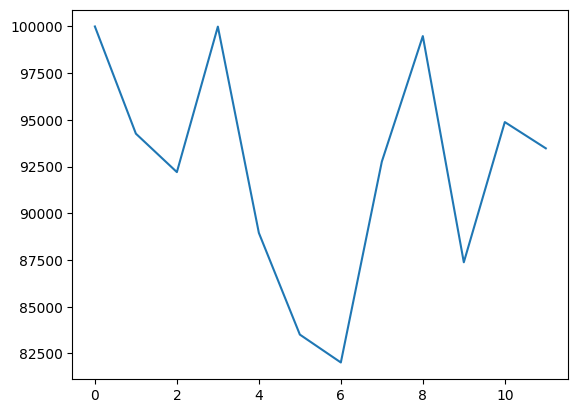

In [46]:
import matplotlib.pyplot as plt
plt.plot(equity_curve)
plt.show()

In [48]:
cagr=(pow((equity_curve[-1]/equity_curve[0]),(1/(len(equity_curve)-1)))-1)*100
print("cagr: "+str(cagr))
net_gain=equity_curve[-1]-portfolio_value
print("net_gain: "+str(net_gain))

cagr: -0.6113146976709505
net_gain: -6522.647321257144


In [50]:
def max_drawdown(window):
    Roll_Max=df['Close'].rolling(window,min_periods=1).max()
    Daily_Drawdown=df['Close']/Roll_Max-1.0
    Max_Daily_Drawdown=Daily_Drawdown.rolling(window,min_periods=1).min()
    Max_Daily_Drawdown.plot()

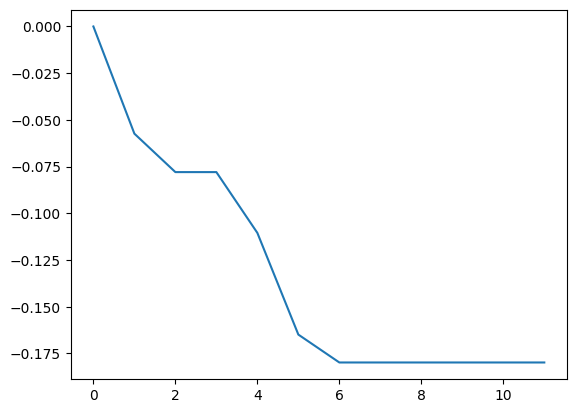

In [54]:
df = pd.DataFrame({'Close':equity_curve})
max_drawdown(len(equity_curve))